In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
max_center_samples = 250
center_r = 3
max_ring_samples = 350
ring_r = 6
ring_w = 1

In [13]:
np.random.seed(0)

center = np.random.normal(loc=0, scale=np.sqrt(center_r), size=(max_center_samples, 2))
center = center[center[:, 0] ** 2 + center[:, 1] ** 2 < center_r ** 2]

ring = np.empty((max_ring_samples, 2))
ring[:, 0] = np.random.uniform(low=-ring_r, high=ring_r, size=max_ring_samples)
ring[:, 1] = np.sqrt(ring_r ** 2 - ring[:, 0] ** 2)
ring[::2, 1] *= -1
ring += np.random.uniform(low=-ring_w / 2, high=ring_w / 2, size=ring.shape)

combined = np.concatenate((center, ring), axis=0)

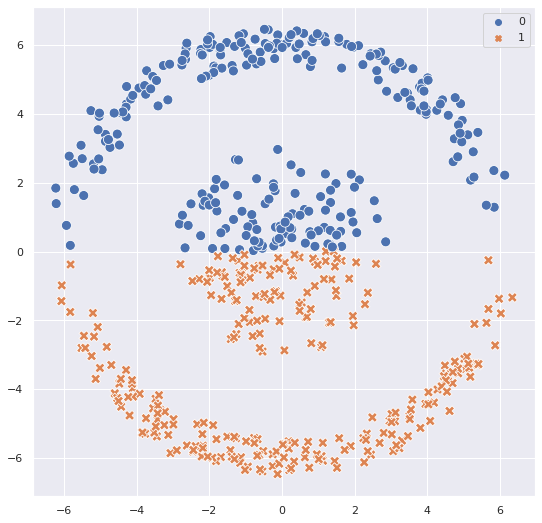

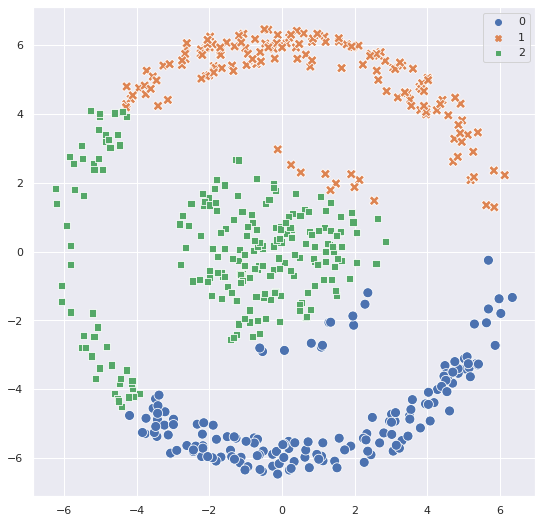

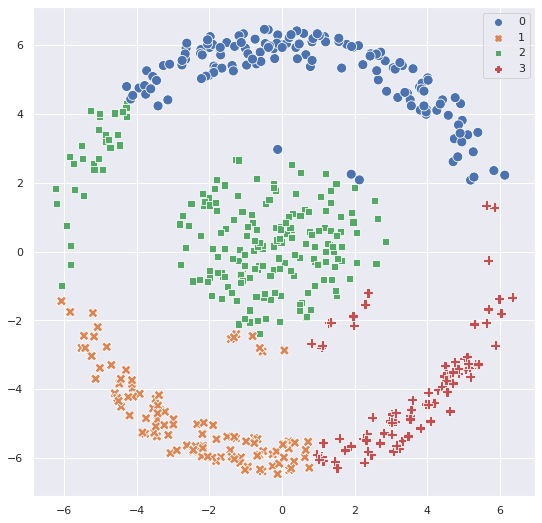

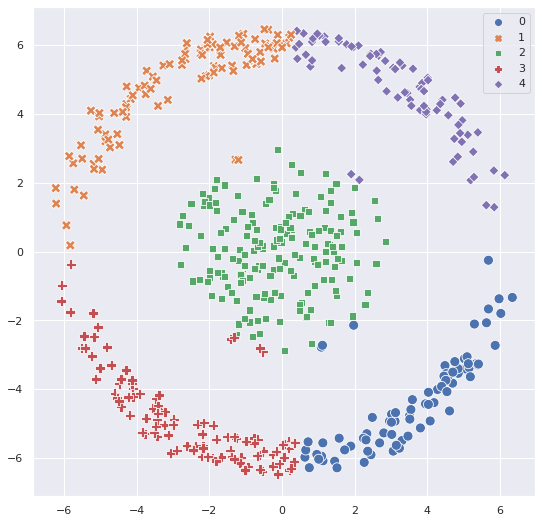

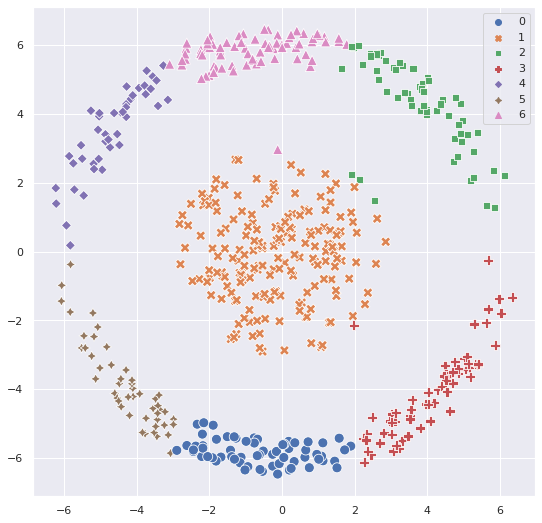

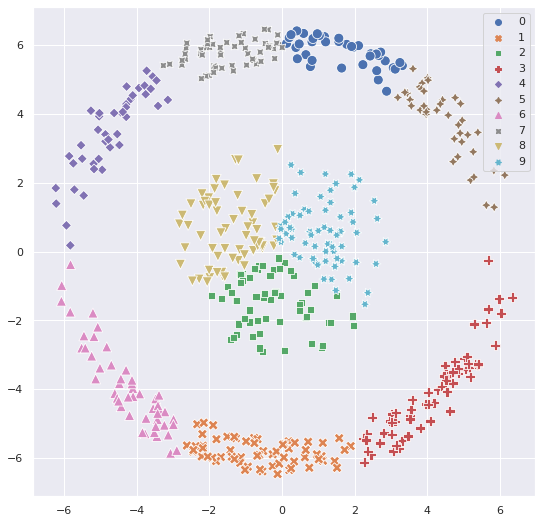

In [27]:
sns.set(rc={'figure.figsize': (9, 9)})
for n_clusters in (2, 3, 4, 5, 7, 10):
    kmeans = KMeans(n_clusters=n_clusters).fit(combined)
    sns.scatterplot(x=combined[:, 0], y=combined[:, 1], style=kmeans.labels_, hue=kmeans.labels_, palette='deep', s=100)
    plt.show()